# Assignment 2 - COMP-5600

## Question 1

You are tasked with developing models to **predict customer churn** for a subscription-based service. Using the provided dataset, your **goal is to build two classification models: one using Logistic Regression and the other using Naive Bayes.** You will compare their performance, interpret the results, and provide insights into customer churn based on your findings. You will **use provided the Telco Customer Churn dataset**, which contains customer information such as demographic details, account features, and whether the customer has churned. Your **target variable is "Churn," indicating whether a customer has left the service.**

### Ensure you follow the below instructions:

• Evaluate both models using the following metrics: Accuracy, Precision, Recall, F1-Score, and ROC-AUC.
• Perform 5-fold cross-validation on both models and report the averaged results.
• If there are any missing values (there will be!), fill them in during a pre-processing step using two of the three common strategies outlined below. Do this for the entire dataset!
* Use the most common value in the dataset that has a value for this feature/attribute
* Use a default value to fill in for missing values. It can be anything.
* Drop that feature all together and use only features that have values for all data points.
* Scale or normalize numerical features if required.


### Ensure that your IPython notebook has text files that has the following details:

* Discuss your outcomes from using your chosen preprocessing steps to handle missing data
* Compare the performance of both models and discuss their strengths and weaknesses. Which model is more suited for this dataset and why?
* Insights gained from your experiments.



In [46]:
'''
* Question 1 Code 
'''

# Import necessary packages + libraries.
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, train_test_split, cross_val_score, StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.naive_bayes import GaussianNB


# Function to fill in missing values with the most frequent value.
def fill_freq(data):
    imp = SimpleImputer(strategy="most_frequent")
    data_in = pd.DataFrame(imp.fit_transform(data), columns=data.columns)
    return data
def fill_mode(data):
    num_cols = data.select_dtypes(include=['number']).columns
    cat_cols = data.select_dtypes(exclude=['number']).columns

    imp_med = SimpleImputer(strategy="most_frequent")
    data[num_cols] = imp_med.fit_transform(data[num_cols])

    imp_const = SimpleImputer(strategy="most_frequent",)
    data[cat_cols] = imp_const.fit_transform(data[cat_cols])

    return data


# Function to fill in missing values with the median value.
# def fill_median(data):
#     imp = SimpleImputer(strategy="constant", fill_value=1)
#     data[['tenure', 'MonthlyCharges']] = imp.fit_transform(data[['tenure', 'MonthlyCharges']])
#     return data

def fill_constant(data):
    num_cols = data.select_dtypes(include=['number']).columns
    cat_cols = data.select_dtypes(exclude=['number']).columns

    imp_med = SimpleImputer(strategy="median")
    data[num_cols] = imp_med.fit_transform(data[num_cols])

    imp_const = SimpleImputer(strategy="constant", fill_value=0)
    data[cat_cols] = imp_const.fit_transform(data[cat_cols])

    return data

# Function to evaluate the model using 5-fold cross-validation.
def eval_model(model, X, y):
    
    # Dictionary creating the different metrics to evaluate the model, using the make_scorer function.
    metrics = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score),
        'roc_auc': make_scorer(roc_auc_score)
    }

    scores = cross_validate(model, X, y, scoring=metrics, cv=5)
    return scores


# Load in the provided data from the Telco dataset.
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


# *** PREPROCESSING STEP ***

# Drop the CustomerID column.
customer_ids = df['customerID']
df = df.drop(columns=['customerID'])

# Convert the TotalCharges column to numeric, and temporarily set non-numeric values to NaN.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Make a df copy for the median and mode fillings.
df_mode = fill_mode(df.copy())

df_median = fill_constant(df.copy())





# Encoding the categorical columns for df_mode.

label_encoders_mode = {}
label_encoders_median = {}

# Get the categorical columns, excluding the true output.
mode_categorical_features = df_mode.select_dtypes(include=['object']).columns.drop('Churn')  
median_categorical_features = df_median.select_dtypes(include=['object']).columns.drop('Churn')  


# Iterate though each column and encode the values.
# Store the encoders in a dictionary for later use on other data, 
# for both mode and median dataframes.
for mode_col, med_col in zip(mode_categorical_features, median_categorical_features):
    le_mod = LabelEncoder()
    le_med = LabelEncoder()
    df_mode[mode_col] = le_mod.fit_transform(df_mode[mode_col])
    df_median[med_col] = le_med.fit_transform(df_median[med_col])
    
    label_encoders_mode[mode_col] = le_mod
    label_encoders_median[med_col] = le_med

## Encode the target variables for both mode and median dataframes.

mode_target_encoder = LabelEncoder()
median_target_encoder = LabelEncoder()

df_mode['Churn'] = mode_target_encoder.fit_transform(df_mode['Churn'])
df_median['Churn'] = median_target_encoder.fit_transform(df_median['Churn'])



# *** MODELING STEP ***
df_nb_mode = df_mode.copy()
df_nb_median = df_median.copy()

# Scale the data for both mode and median dataframes.
scaler_mode = StandardScaler()
scaler_median = StandardScaler()

# Get the numerical columns, to ensure others aren't scaled.
numerical_features = ['tenure', 'MonthlyCharges']

# Scale the numerical columns.
df_mode[numerical_features] = scaler_mode.fit_transform(df_mode[numerical_features])
df_median[numerical_features] = scaler_median.fit_transform(df_median[numerical_features])

# Split the data into training and testing sets for both mode and median dataframes.
X_mode = df_mode.drop(columns=['Churn'])
X_nb_mode = df_nb_mode.drop(columns=['Churn'])
y_mode = df_mode['Churn']
y_nb_mode = df_nb_mode['Churn']

X_median = df_median.drop(columns=['Churn'])
X_nb_median = df_nb_median.drop(columns=['Churn'])
y_median = df_median['Churn']
y_nb_median = df_nb_median['Churn']


lr_mode = LogisticRegression(max_iter=7000)
lr_median = LogisticRegression( max_iter=7000)

# Create a naive bayes model for each df.
nb_mode = GaussianNB()
nb_median = GaussianNB()

lr_mode_scores = eval_model(lr_mode, X_mode, y_mode)
lr_median_scores = eval_model(lr_median, X_median, y_median)

nb_mode_scores = eval_model(nb_mode, X_nb_mode, y_nb_mode)
nb_median_scores = eval_model(nb_median, X_nb_median, y_nb_median)

# Calculate the average scores for each metric, for both mode and median dataframes.
lr_mode_scores_avg = {metric: scores.mean() for metric, scores in lr_mode_scores.items() if 'test_' in metric}
lr_median_scores_avg = {metric: scores.mean() for metric, scores in lr_median_scores.items() if 'test_' in metric}

nb_mode_scores_avg = {metric: scores.mean() for metric, scores in nb_mode_scores.items() if 'test_' in metric}
nb_median_scores_avg = {metric: scores.mean() for metric, scores in nb_median_scores.items() if 'test_' in metric}

# Output the results
print("Logistic Regression Scores with Mode Filling:", lr_mode_scores_avg)
print("Logistic Regression Scores with Median Filling:", lr_median_scores_avg)

print("Naive Bayes Scores with Mode Filling:", nb_mode_scores_avg)
print("Naive Bayes Scores with Median Filling:", nb_median_scores_avg)
























Logistic Regression Scores with Mode Filling: {'test_accuracy': np.float64(0.802499858861862), 'test_precision': np.float64(0.6528883458240898), 'test_recall': np.float64(0.5457513153933277), 'test_f1': np.float64(0.5944998310382755), 'test_roc_auc': np.float64(0.72049879003765)}
Logistic Regression Scores with Median Filling: {'test_accuracy': np.float64(0.8024999596748177), 'test_precision': np.float64(0.6529012740249558), 'test_recall': np.float64(0.5457513153933277), 'test_f1': np.float64(0.5944971645329467), 'test_roc_auc': np.float64(0.7204988834790015)}
Naive Bayes Scores with Mode Filling: {'test_accuracy': np.float64(0.7530892114007355), 'test_precision': np.float64(0.524868504886578), 'test_recall': np.float64(0.7383707760462215), 'test_f1': np.float64(0.6134822494313783), 'test_roc_auc': np.float64(0.7483899217974873)}
Naive Bayes Scores with Median Filling: {'test_accuracy': np.float64(0.7530892114007355), 'test_precision': np.float64(0.524868504886578), 'test_recall': np.f

### Question 1 Findings + Discussion:


#### Outcomes Discussion
After completing the creating and analysis of the models, I found some rather odd results come from both models, in terms of the different filling methods I chose to use for NaN values. After creating two different dataframes for representing either filling method, I found that the average scores were identical for both of the different filling methods. This was rather odd to me, as I had ensured to account for any cases in which there were missing values. 

My workaround for this eventually led to slightly different values outputted from the logistic regression, however the Naive Bayes still continue to be identical. My workaround was that for the strategy involving the median replacement, I inputted logic to change the value of all NaN non-numerical values to 0. For the Mode replacement, I simply continued to make them the most frequent.

Outside of this issue, my results providing some eye opening data depending on which score we choose to look at. For both accuracy and precision, we can see that the logistic regression model performs better, by a fairly decent margain in both instances. For the remaining metrics recall, f1, and roc auc, however, we can see that the Naive Bayes performs better by a smaller margain in all cases outside of recall, in which it was significantly better performing. 

What we can conclude from these outputs, is that Logistic Regression does a better job at predicting customers who do not churn since it considers less false positives, whereas Naive Bayes is better at predicting customers who do indeed churn. Based on the initial request, it seems fitting that we would use Naive Bayes as we are looking to identify as many churned customers as possible in order to minimize customer loss. 

Overall, I continued to learn just how powerful scikit-learn is, with all of the different function capabilities that can handpicked for nearly any scenario. It took a lot of trial and error to discover that some techniques I implemented are infact already automated, which was really an amazing discovery that I was able to go back and implement after the fact. Overall, super interesting experiment.



## Question 2

In this question, you will be **using k-means to perform image compression**. Implement a **naïve version** of the k-means algorithm based on your understanding. Your **code must take the number of clusters k as input and perform k-means clustering on the given image** (test_image.png). Once the algorithm finishes running, the cluster centroids represent the top-k common colors in the image. **Iterate through each pixel in the image and assign the closest color to each pixel. Save and visualize the resulting image.** For reading and writing images, you can use OpenCV, which is an open-source computer vision toolkit. The following code will load the image into a NumPy array. You can use this as input to your K-Means algorithm.

<br/>

```python
import cv2
img = cv2.imread(‘test_image.png’)
height, width, channels = np.shape(img)
for i in width:
    for j in height:
        pixel = img[j][i] # Read the pixel at location (i,j)
        img[j][i] = newValue # Assign a new value to the pixel
```

<br/>

Experiment with different values of k and briefly describe your thoughts about which value works best for this problem. You can use plots, error bars, etc. to support your conclusions.


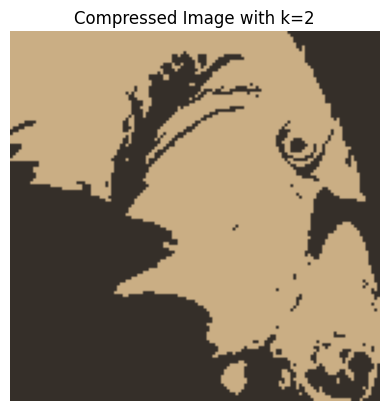

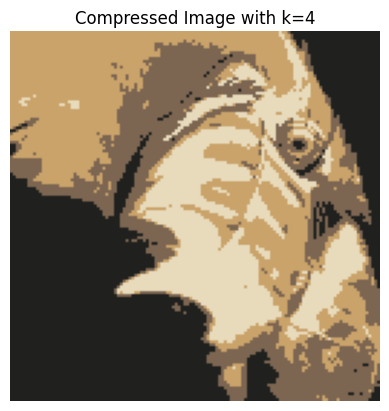

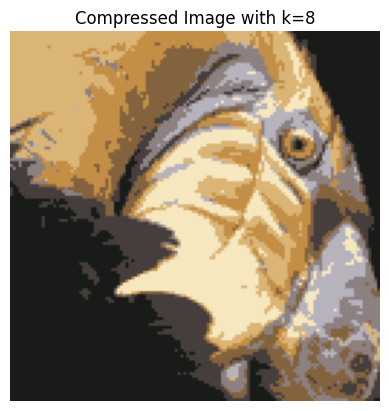

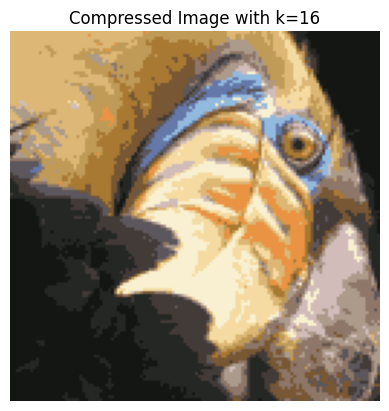

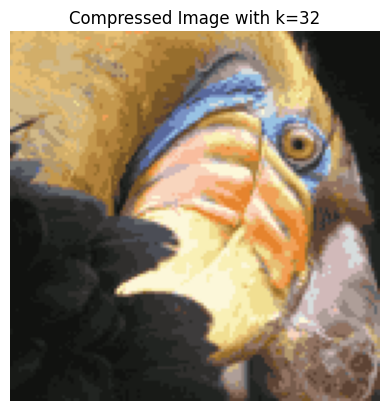

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image.
img = cv2.imread('test_image.png')

# Get the dimensions of the image.
height, width, channels = np.shape(img)

# K-means algorithm for clustering pixels.
def k_means(pixels, k, max_iters=100):
    # Initialize k centroids randomly from the pixels.
    centroids = pixels[np.random.choice(pixels.shape[0], k, replace=False)]
    
    # Iterate to adjust centroids.
    for _ in range(max_iters):
        # Compute the distance between each pixel and each centroid.
        distances = np.linalg.norm(pixels[:, np.newaxis] - centroids, axis=2)  
        # Assign each pixel to the nearest centroid.
        labels = np.argmin(distances, axis=1) 
        
        # Recalculate centroids.
        new_centroids = np.array([pixels[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence (if centroids do not change).
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, labels

# Function to compress the image using k-means
def compress_image(img, k):
    height, width, channels = np.shape(img)
    
    # Reshape the image into a 2D array of pixels, taking into account the RGB channels.
    pixels = img.reshape(-1, 3)  
    
    # Perform K-means clustering
    centroids, labels = k_means(pixels, k)
    
    # Iterate through each pixel and assign the nearest centroid color
    for i in range(width):
        for j in range(height):
            # Calculate the index of the pixel in the 1D array.
            pixel_index = j * width + i  
            # Assign the pixel the color of the nearest centroid.
            img[j][i] = centroids[labels[pixel_index]]  
    
    return img

# Function to display the image.
def show_image(image, title):
    # Convert the image from BGR to RGB, originals were inverted.
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  
    #plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Test the function with different values of k.
for k in [2, 4, 8, 16, 32]:
    compressed_img = compress_image(img.copy(), k)
    
    # Save the compressed image.
    cv2.imwrite(f'compressed_image_k{k}.png', compressed_img)
    
    # Display the compressed image.
    show_image(compressed_img, f'Compressed Image with k={k}')

### Question 2 Findings + Discussion:



After experimenting with different values of k, it quickly became obvious that the larger the k value, the more evident success that we would have with outputting the image correctly. As shown in the image printed during each iteration, a larger k allowed for much more colors to be accounted for, leading to greater image reconstruction. Overall, this shows that the highest vlaue of k without a doubt works better.